# Projet Supply Chain - DS23

Notre projet porte sur l'analyse d'une supply chain et donc l'ensemble des étapes d'approvisionnement, du processus productif 
et de distribution de la marchandise.

En aval de ce processus, il peut être intéressant d'évaluer la satisfaction client : 
- les produits correspondent ils à leurs besoins ?
- si non : quels sont les motifs d'insatisfactions ?
- en cas d'insatisfaction, des retours leurs sont ils faits ? sous combien de temps ?
- le secteur d'achat a t'il un impact dans le type d'avis reçu ?

Dans le cadre de notre analyse, nous allons étudier différentes données issues de scrapping de différents sites internet d'entreprises de secteurs d'activité différentes :
- cosmétique
- agro alimentaire
- vestimentaire
- milieu du sport
En fonction des données récupérées et de leur analyse, nous orienterons notre projet vers un domaine spécifique.


## 1. Rapport d'exploration, de data visualisation et de pre-processing des données

### 1.1 Collecte des données

In [70]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

#### a) Jeu de données scrappé sur le site Trustpilot - company Uniqlo

In [71]:
from bs4 import BeautifulSoup as bs
import requests

In [72]:
url_uniqlo='https://fr.trustpilot.com/review/www.uniqlo.com'
company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav =[], [], [], [], [], [], [], [], [], []


for page_number in range(1, 20): 
    url_uni=f"{url_uniqlo}?page={page_number}"
    page_uni=requests.get(url_uni, verify=False)
    soup_uniqlo=bs(page_uni.content, 'lxml')

    for donnees in soup_uniqlo.find_all('div', attrs = {'class' : "styles_reviewCardInner__EwDq2"}) :
      
        company.append('Uniqlo')
        
        personne=donnees.find('span', class_='typography_heading-xxs__QKBS8 typography_appearance-default__AAY17').text.strip()
        client.append(personne) 
        
        avis=donnees.find('span', class_='typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l').text.strip()
        nb_avis_client.append(avis)
                
        date_cde=donnees.find('p', class_='typography_body-m__xgxZ_ typography_appearance-default__AAY17').text.strip()
        date_commande.append(date_cde[22:]) 
        
        #etoile=donnees.find('img') - renvoie, à tort, des notes vides ne pouvant pas être converties en 'int'
        #notes.append(etoile['alt'])
        
        extrac_notes=donnees.find('div', attrs={"star-rating_starRating__4rrcf star-rating_medium__iN6Ty"})
        nb_notes=extrac_notes.find_next('img')
        notes.append(nb_notes['src'])        
          
        titre = donnees.find("h2", class_="typography_heading-s__f7029 typography_appearance-default__AAY17").text
        titre_commentaire.append(titre)
              
        comments = donnees.find('div', attrs={"styles_reviewContent__0Q2Tg"})
        comments_2 = comments.find_next('p').text
        commentaire.append(comments_2)
        
    
        date_com=donnees.find('div', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_datesWrapper__RCEKH"})
        com=date_com.find_next('time')
        date_commentaire.append(com['datetime'])
        
        rep_sav = donnees.find(class_ = "typography_body-m__xgxZ_ typography_appearance-default__AAY17 styles_message__shHhX")
        if rep_sav == None:
            reponse_sav.append("NaN")
        else:
            reponse_sav.append(rep_sav.getText())
           
        date_rep_sav=donnees.find('time', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_replyDate__Iem0_"})
        if date_rep_sav is not None:
            date_rep_sav=date_rep_sav['datetime']
            date_reponse_sav.append(date_rep_sav)
        else:
            date_reponse_sav.append('NaN')
    
print(company)
print(client)
print(nb_avis_client)
print(date_commande)
print(notes)
print(titre_commentaire)
print(commentaire)#trop de balise
print(date_commentaire)
print(reponse_sav)
print(date_reponse_sav)



C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedoc

['Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo',

C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [73]:
import pandas as pd

df_uniqlo = pd.DataFrame(list(zip(company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav)),
               columns =['company', 'client', 'nb_avis_client', 'date_commande', 'notes', 'titre_commentaire', 'commentaire',  'date_commentaire',  'reponse_sav', 'date_reponse_sav'])

df_uniqlo['notes'] = df_uniqlo['notes'].str.replace('https://cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-', '')
df_uniqlo['notes'] = df_uniqlo['notes'].str.replace('.svg', '')

display(df_uniqlo.head())


,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav
0,Uniqlo,PtitMad'Abdullah PtitMad'Abdullah,3 avis,03 juillet 2023,1,Uniqlo et Stuart non reçu et non remboursabler,"Madame, Monsieur,Je vous informe que suite à m...",2023-07-07T12:41:03.000Z,NaN,NaN
1,Uniqlo,Chabada,3 avis,05 juillet 2023,1,Pulls boulochent et SAV nul,Très mauvaise expérience avec les pulls en lai...,2023-07-05T12:10:29.000Z,NaN,NaN
2,Uniqlo,ELLE,1 avis,29 juin 2023,1,Expérience déplorable au magasin Uniqlo de Passy,Nous sommes allées dans le magasin Uniqlo de P...,2023-06-29T17:03:58.000Z,NaN,NaN
3,Uniqlo,Antoine,1 avis,21 juin 2023,1,Article jamais reçu,"Article jamais reçu, cela fait plus de 15 jour...",2023-06-21T10:19:09.000Z,NaN,NaN
4,Uniqlo,Mathieu,12 avis,02 juillet 2023,5,Impeccable,"Je suis un habitué des vêtements Uniqlo, je re...",2023-07-04T09:24:51.000Z,NaN,NaN


#### b) Jeu de données scrappé sur le site Trustpilot - company Spartoo.com

In [74]:
url_spartoo='https://fr.trustpilot.com/review/www.spartoo.com'
company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav =[], [], [], [], [], [], [], [], [], []


for page_number in range(1, 20): 
    url_uni=f"{url_spartoo}?page={page_number}"
    page_spartoo=requests.get(url_spartoo, verify=False)
    soup_spartoo=bs(page_spartoo.content, 'lxml')

    for donnees in soup_spartoo.find_all('div', attrs = {'class' : "styles_reviewCardInner__EwDq2"}) :
      
        company.append('Spartoo')
        
        personne=donnees.find('span', class_='typography_heading-xxs__QKBS8 typography_appearance-default__AAY17').text.strip()
        client.append(personne)  
        
        avis=donnees.find('span', class_='typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l').text.strip()
        nb_avis_client.append(avis)
                
        date_cde=donnees.find('p', class_='typography_body-m__xgxZ_ typography_appearance-default__AAY17').text.strip()
        date_commande.append(date_cde[22:]) 
        
        extrac_notes=donnees.find('div', attrs={"star-rating_starRating__4rrcf star-rating_medium__iN6Ty"})
        nb_notes=extrac_notes.find_next('img')
        notes.append(nb_notes['src']) 
          
        titre = donnees.find("h2", class_="typography_heading-s__f7029 typography_appearance-default__AAY17").text
        titre_commentaire.append(titre)
              
        comments = donnees.find('div', attrs={"styles_reviewContent__0Q2Tg"})
        comments_2 = comments.find_next('p').text
        commentaire.append(comments_2)
        
    
        date_com=donnees.find('div', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_datesWrapper__RCEKH"})
        com=date_com.find_next('time')
        date_commentaire.append(com['datetime'])
        
        rep_sav = donnees.find(class_ = "typography_body-m__xgxZ_ typography_appearance-default__AAY17 styles_message__shHhX")
        if rep_sav == None:
            reponse_sav.append("NaN")
        else:
            reponse_sav.append(rep_sav.getText())
           
        date_rep_sav=donnees.find('time', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_replyDate__Iem0_"})
        if date_rep_sav is not None:
            date_rep_sav=date_rep_sav['datetime']
            date_reponse_sav.append(date_rep_sav)
        else:
            date_reponse_sav.append('NaN')
            

print(company)
print(client)
print(nb_avis_client)
print(date_commande)
print(notes)
print(titre_commentaire)
print(commentaire)#trop de balise
print(date_commentaire)
print(reponse_sav)
print(date_reponse_sav)

C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedoc

['Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo'

In [75]:
df_spartoo = pd.DataFrame(list(zip(company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav)),
               columns =['company', 'client', 'nb_avis_client', 'date_commande', 'notes', 'titre_commentaire', 'commentaire',  'date_commentaire',  'reponse_sav', 'date_reponse_sav'])

df_spartoo['notes'] = df_spartoo['notes'].str.replace('https://cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-', '')
df_spartoo['notes'] = df_spartoo['notes'].str.replace('.svg', '')

display(df_spartoo.head())


,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav
0,Spartoo,Cortinovis Laurent,2 avis,08 juillet 2023,5,Très bonne expérience pour mon premier…,"Très bonne expérience pour mon premier achat, ...",2023-07-09T05:59:33.000Z,NaN,NaN
1,Spartoo,Cyril,1 avis,07 juillet 2023,5,"Retour d'article auprès des ""vendeurs partenai...","J'ai eu un souci sur la taille de mon article,...",2023-07-07T20:09:28.000Z,NaN,NaN
2,Spartoo,Corinne Murat,1 avis,08 juillet 2023,1,"Bonjour,","Bonjour,Je ne comprends pas, j'avais demandé u...",2023-07-08T23:19:25.000Z,NaN,NaN
3,Spartoo,Steph VVL,1 avis,03 juillet 2023,5,Article conforme à la description,Article conforme à la description. Livraison r...,2023-07-09T09:38:29.000Z,NaN,NaN
4,Spartoo,marine,7 avis,28 juin 2023,3,pourquoi tous les avis ne sont pas…,pourquoi tous les avis ne sont pas affichés su...,2023-07-06T15:46:27.000Z,"Bonjour,Je suis Marie, responsable du Service ...",2023-07-07T07:47:18.000Z


#### c) Jeu de données scrappé sur le site Trustpilot - company Vinted

In [76]:
url_vinted='https://fr.trustpilot.com/review/vinted.fr'
company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav =[], [], [], [], [], [], [], [], [], []


for page_number in range(1, 20): 
    url_vinted=f"{url_vinted}?page={page_number}"
    page_vinted=requests.get(url_vinted, verify=False)
    soup_vinted=bs(page_vinted.content, 'lxml')

    for donnees in soup_vinted.find_all('div', attrs = {'class' : "styles_reviewCardInner__EwDq2"}) :
      
        company.append('Vinted')
        
        personne=donnees.find('span', class_='typography_heading-xxs__QKBS8 typography_appearance-default__AAY17').text.strip()
        client.append(personne) 
        
        avis=donnees.find('span', class_='typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l').text.strip()
        nb_avis_client.append(avis)
                
        date_cde=donnees.find('p', class_='typography_body-m__xgxZ_ typography_appearance-default__AAY17').text.strip()
        date_commande.append(date_cde[22:]) 
        
        extrac_notes=donnees.find('div', attrs={"star-rating_starRating__4rrcf star-rating_medium__iN6Ty"})
        nb_notes=extrac_notes.find_next('img')
        notes.append(nb_notes['src']) 
          
        titre = donnees.find("h2", class_="typography_heading-s__f7029 typography_appearance-default__AAY17").text
        titre_commentaire.append(titre)
              
        comments = donnees.find('div', attrs={"styles_reviewContent__0Q2Tg"})
        comments_2 = comments.find_next('p').text
        commentaire.append(comments_2)
        
    
        date_com=donnees.find('div', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_datesWrapper__RCEKH"})
        com=date_com.find_next('time')
        date_commentaire.append(com['datetime'])
        
        rep_sav = donnees.find(class_ = "typography_body-m__xgxZ_ typography_appearance-default__AAY17 styles_message__shHhX")
        if rep_sav == None:
            reponse_sav.append("NaN")
        else:
            reponse_sav.append(rep_sav.getText())
           
        date_rep_sav=donnees.find('time', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_replyDate__Iem0_"})
        if date_rep_sav is not None:
            date_rep_sav=date_rep_sav['datetime']
            date_reponse_sav.append(date_rep_sav)
        else:
            date_reponse_sav.append('NaN')
    
print(company)
print(client)
print(nb_avis_client)
print(date_commande)
print(notes)
print(titre_commentaire)
print(commentaire)#trop de balise
print(date_commentaire)
print(reponse_sav)
print(date_reponse_sav)

C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedoc

['Vinted', 'Vinted', 'Vinted', 'Vinted', 'Vinted', 'Vinted', 'Vinted', 'Vinted', 'Vinted', 'Vinted', 'Vinted', 'Vinted', 'Vinted', 'Vinted', 'Vinted', 'Vinted', 'Vinted', 'Vinted', 'Vinted', 'Vinted']
['Valentin Couchut', 'Yuko Nenette', 'Morti Mc Addams', 'Bba', 'Claudia Espinho', 'Gallus MBOA', 'bernadette.diniakos', 'Camille', 'Anais', 'Rime Djebali', 'Celine M', 'Kiki Kitsune', 'serge', 'Ndeye Diallo', 'Frédérique Hoyau', 'Marina Alix', 'JG', 'ZE M', 'Mme Gauthier', 'B W']
['3 avis', '1 avis', '1 avis', '2 avis', '1 avis', '1 avis', '2 avis', '1 avis', '1 avis', '1 avis', '3 avis', '1 avis', '3 avis', '1 avis', '1 avis', '1 avis', '3 avis', '1 avis', '2 avis', '1 avis']
['08 juillet 2023', '27 juin 2023', '08 juillet 2023', '07 juillet 2023', '08 juillet 2023', '05 juillet 2023', '06 juillet 2023', '07 juillet 2023', '06 juillet 2023', '08 juillet 2023', '06 juillet 2023', '05 juillet 2023', '06 juillet 2023', '08 juillet 2023', '07 juillet 2023', '07 juillet 2023', '04 juillet 202

In [77]:
df_vinted = pd.DataFrame(list(zip(company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav)),
               columns =['company', 'client', 'nb_avis_client', 'date_commande', 'notes', 'titre_commentaire', 'commentaire',  'date_commentaire',  'reponse_sav', 'date_reponse_sav'])

df_vinted['notes'] = df_vinted['notes'].str.replace('https://cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-', '')
df_vinted['notes'] = df_vinted['notes'].str.replace('.svg', '')

display(df_vinted.head())


,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav
0,Vinted,Valentin Couchut,3 avis,08 juillet 2023,5,Je recommande sans hésiter !,Je m’y suis inscrit sans grande conviction au ...,2023-07-09T09:42:40.000Z,NaN,NaN
1,Vinted,Yuko Nenette,1 avis,27 juin 2023,5,Demande d'amélioration.,"Bonjour, Super pratique et surtout ça fait du ...",2023-07-07T20:38:51.000Z,NaN,NaN
2,Vinted,Morti Mc Addams,1 avis,08 juillet 2023,5,Confiance,"Je suis satisfaite de la variété de produits, ...",2023-07-09T10:22:22.000Z,NaN,NaN
3,Vinted,Bba,2 avis,07 juillet 2023,1,Vinted se décharge de tout et toutes…,Vinted se décharge de tout et toutes responsab...,2023-07-07T12:43:34.000Z,NaN,NaN
4,Vinted,Claudia Espinho,1 avis,08 juillet 2023,5,Avec vinted des économies vous allez en faire,"Avec vinted on peut faire des économies, c'est...",2023-07-08T21:05:57.000Z,NaN,NaN


#### d) Jeu de données scrappé sur le site Trustpilot - company La Boutique Officielle

In [78]:
url_boutique='https://fr.trustpilot.com/review/laboutiqueofficielle.com'
company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav =[], [], [], [], [], [], [], [], [], []

for page_number in range(1, 20): 
    url_boutique=f"{url_boutique}?page={page_number}"
    page_boutique=requests.get(url_boutique, verify=False)
    soup_boutique=bs(page_boutique.content, 'lxml')

    for donnees in soup_boutique.find_all('div', attrs = {'class' : "styles_reviewCardInner__EwDq2"}) :
      
        company.append('La Boutique Officielle')
        
        personne=donnees.find('span', class_='typography_heading-xxs__QKBS8 typography_appearance-default__AAY17').text.strip()
        client.append(personne) 
        
        avis=donnees.find('span', class_='typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l').text.strip()
        nb_avis_client.append(avis)
                
        date_cde=donnees.find('p', class_='typography_body-m__xgxZ_ typography_appearance-default__AAY17').text.strip()
        date_commande.append(date_cde[22:]) 
        
        extrac_notes=donnees.find('div', attrs={"star-rating_starRating__4rrcf star-rating_medium__iN6Ty"})
        nb_notes=extrac_notes.find_next('img')
        notes.append(nb_notes['src']) 
          
        titre = donnees.find("h2", class_="typography_heading-s__f7029 typography_appearance-default__AAY17").text
        titre_commentaire.append(titre)
              
        comments = donnees.find('div', attrs={"styles_reviewContent__0Q2Tg"})
        comments_2 = comments.find_next('p').text
        commentaire.append(comments_2)
        
    
        date_com=donnees.find('div', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_datesWrapper__RCEKH"})
        com=date_com.find_next('time')
        date_commentaire.append(com['datetime'])
        
        rep_sav = donnees.find(class_ = "typography_body-m__xgxZ_ typography_appearance-default__AAY17 styles_message__shHhX")
        if rep_sav == None:
            reponse_sav.append("NaN")
        else:
            reponse_sav.append(rep_sav.getText())
           
        date_rep_sav=donnees.find('time', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_replyDate__Iem0_"})
        if date_rep_sav is not None:
            date_rep_sav=date_rep_sav['datetime']
            date_reponse_sav.append(date_rep_sav)
        else:
            date_reponse_sav.append('NaN')
    
print(company)
print(client)
print(nb_avis_client)
print(date_commande)
print(notes)
print(titre_commentaire)
print(commentaire)#trop de balise
print(date_commentaire)
print(reponse_sav)
print(date_reponse_sav)

C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedoc

['La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle']
['Carretero david', 'noetoiles', 'Micky', 'Client', 'jean xavier', 'Faÿ Alexandre', 'Matthieu Lpz', 'Virginie', 'Denis COHEN', 'Maxime', 'GENEST Marie-christine', 'Lolitatof', 'Alain Ducombs', 'luiggi giordano', 'camagno cyrille', 'ml ml', 'LAETITIA', 'Coloss', 'Elisabeth Colin', 'Olivier Lenain']
['1 avis', '3 avis', '1 avis', '16 avis', '3 avis', '31 avis', '2 avis', '12 avis', '2 avis', '5 avis', '3 avis', '2 avis', '1 avis', '6 avis', '1 avis', '2 avis', '1 avis', '1 avi

C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [79]:
df_boutique_officielle = pd.DataFrame(list(zip(company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav)),
               columns =['company', 'client', 'nb_avis_client', 'date_commande', 'notes', 'titre_commentaire', 'commentaire',  'date_commentaire',  'reponse_sav', 'date_reponse_sav'])

df_boutique_officielle['notes'] = df_boutique_officielle['notes'].str.replace('https://cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-', '')
df_boutique_officielle['notes'] = df_boutique_officielle['notes'].str.replace('.svg', '')

display(df_boutique_officielle.head())

,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav
0,La Boutique Officielle,Carretero david,1 avis,28 juin 2023,5,C'est officielement le 1er avis que je…,C'est officielement le 1er avis que je partage...,2023-07-09T00:22:39.000Z,NaN,NaN
1,La Boutique Officielle,noetoiles,3 avis,28 juin 2023,5,Super site mais le retour des articles payant ...,J'adore ce site qui propose toutes les meilleu...,2023-07-08T19:44:15.000Z,NaN,NaN
2,La Boutique Officielle,Micky,1 avis,05 juillet 2023,5,Très satisfait des articles commandés,"Très satisfait des articles commandés, livrais...",2023-07-08T19:25:44.000Z,NaN,NaN
3,La Boutique Officielle,Client,16 avis,07 juillet 2023,5,Je ne connaissais pas cette boutique et…,Je ne connaissais pas cette boutique et applic...,2023-07-07T22:26:18.000Z,NaN,NaN
4,La Boutique Officielle,jean xavier,3 avis,06 juillet 2023,5,"Société pro et sérieuse, articles de qualités","Société BO super professionnelle et sérieuse ,...",2023-07-06T20:16:03.000Z,NaN,NaN


#### e) Fusion des dataframes 

In [133]:
df_vetements=pd.concat([df_uniqlo, df_spartoo, df_vinted, df_boutique_officielle], ignore_index=True)

df_vetements.head()

,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav
0,Uniqlo,PtitMad'Abdullah PtitMad'Abdullah,3 avis,03 juillet 2023,1,Uniqlo et Stuart non reçu et non remboursabler,"Madame, Monsieur,Je vous informe que suite à m...",2023-07-07T12:41:03.000Z,NaN,NaN
1,Uniqlo,Chabada,3 avis,05 juillet 2023,1,Pulls boulochent et SAV nul,Très mauvaise expérience avec les pulls en lai...,2023-07-05T12:10:29.000Z,NaN,NaN
2,Uniqlo,ELLE,1 avis,29 juin 2023,1,Expérience déplorable au magasin Uniqlo de Passy,Nous sommes allées dans le magasin Uniqlo de P...,2023-06-29T17:03:58.000Z,NaN,NaN
3,Uniqlo,Antoine,1 avis,21 juin 2023,1,Article jamais reçu,"Article jamais reçu, cela fait plus de 15 jour...",2023-06-21T10:19:09.000Z,NaN,NaN
4,Uniqlo,Mathieu,12 avis,02 juillet 2023,5,Impeccable,"Je suis un habitué des vêtements Uniqlo, je re...",2023-07-04T09:24:51.000Z,NaN,NaN


### 1.2 Exploration des données

Analyse des variables

Le dataframe réalisé est composé des variables suivantes :
- company : l'entreprise dans laquelle les clients ont achété leurs produits
- client : nom / pseudo du client ayant acheté dans la company
- nb_avis_client : nombre d'avis du client émis sur la plateforme d'avis Trustpilot
- date_commande : date de l'expérience d'achat
- notes : nombre d'étoiles mis par le client pour son achat
- titre_commentaire : mot clef résumant le commentaire
- commentaire : commentaire du client détaillant son achat
- date_commentaire : date à laquelle le commentaire a été écrit sur le site (Trustpilot)
- reponse_sav : date à laquelle le service SAV a répondu au commentaire du client (en cas d'absence de retour : NaN)
- annee_commande : année de l'expérience d'achat du client

Analyse du type des variables

In [95]:
print(df_vetements.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   company            781 non-null    object
 1   client             781 non-null    object
 2   nb_avis_client     781 non-null    object
 3   date_commande      781 non-null    object
 4   notes              781 non-null    object
 5   titre_commentaire  781 non-null    object
 6   commentaire        781 non-null    object
 7   date_commentaire   781 non-null    object
 8   reponse_sav        781 non-null    object
 9   date_reponse_sav   781 non-null    object
dtypes: object(10)
memory usage: 61.1+ KB
None


L'analyse des variables va nous amener à :
- transformer les variables 'nb avis client' et 'notes' en nombre entier et changer leurs types en 'int' afin que l'on puisse exploiter ces variables
- changer le type des variables date_commentaire, date_reponse_sav en datetime afin de pouvoir exploiter les périodes associées
- nous pourrons alors calculer la différence entre la date du commentaire client et le retour du SAV

Nous extraierons également l'année de commande afin de pouvoir suivre l'évolution des notes en fonction du temps.

In [134]:
# transformation du type de la note
df_vetements['notes']=df_vetements['notes'].astype('int')

In [135]:
# transformation du nombre d'avis par client en nombre puis de son type en 'int'
df_vetements['nb_avis_client'] = df_vetements['nb_avis_client'].str.replace(' avis', '')
df_vetements['nb_avis_client']=df_vetements['nb_avis_client'].astype('int')

In [128]:
"""
# ajout d'une colonne dans le dataframe afin de pouvoir suivre une évolution 
df_vetements["annee_commande"] = df_vetements["date_commande"].apply(lambda x: x.split()[2]).astype("int")
df_vetements.head()
"""

'\n# ajout d\'une colonne dans le dataframe afin de pouvoir suivre une évolution \ndf_vetements["annee_commande"] = df_vetements["date_commande"].apply(lambda x: x.split()[2]).astype("int")\ndf_vetements.head()\n'

In [136]:
# changement du format des dates de commande et de leurs types en datetime

from datetime import datetime
import locale
locale.setlocale(locale.LC_TIME, 'fr_FR')

def changement_date(date_cde):
    nlle_date = datetime.strptime(date_cde, '%d %B %Y')
    return nlle_date.strftime('%Y-%m-%d')

df_vetements['date_commande'] = df_vetements['date_commande'].apply(changement_date)

In [137]:
# changement du format des dates de commentaires et de leurs types en datetime

def changement_date2(date_comm):
    nlle_date = datetime.strptime(date_comm, '%Y-%m-%dT%H:%M:%S.%fZ')
    return nlle_date.strftime('%Y-%m-%d')

df_vetements['date_commentaire'] = df_vetements['date_commentaire'].apply(changement_date2)

In [138]:
# on force le changement de type de date_commentaire
df_vetements['date_commentaire'] = pd.to_datetime(df_vetements['date_commentaire'])

In [139]:
# on force le changement de type de date_reponse_sav
df_vetements['date_reponse_sav'] = pd.to_datetime(df_vetements['date_reponse_sav'])

In [140]:
df_vetements.head()

,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav
0,Uniqlo,PtitMad'Abdullah PtitMad'Abdullah,3,2023-07-03,1,Uniqlo et Stuart non reçu et non remboursabler,"Madame, Monsieur,Je vous informe que suite à m...",2023-07-07,NaN,NaT
1,Uniqlo,Chabada,3,2023-07-05,1,Pulls boulochent et SAV nul,Très mauvaise expérience avec les pulls en lai...,2023-07-05,NaN,NaT
2,Uniqlo,ELLE,1,2023-06-29,1,Expérience déplorable au magasin Uniqlo de Passy,Nous sommes allées dans le magasin Uniqlo de P...,2023-06-29,NaN,NaT
3,Uniqlo,Antoine,1,2023-06-21,1,Article jamais reçu,"Article jamais reçu, cela fait plus de 15 jour...",2023-06-21,NaN,NaT
4,Uniqlo,Mathieu,12,2023-07-02,5,Impeccable,"Je suis un habitué des vêtements Uniqlo, je re...",2023-07-04,NaN,NaT


In [141]:
# on vérifie que toutes les modifications aient bien été appliquées
df_vetements.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   company            781 non-null    object             
 1   client             781 non-null    object             
 2   nb_avis_client     781 non-null    int32              
 3   date_commande      781 non-null    object             
 4   notes              781 non-null    int32              
 5   titre_commentaire  781 non-null    object             
 6   commentaire        781 non-null    object             
 7   date_commentaire   781 non-null    datetime64[ns]     
 8   reponse_sav        781 non-null    object             
 9   date_reponse_sav   40 non-null     datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), int32(2), object(6)
memory usage: 55.0+ KB


In [89]:
# on regarde le nombre de valeurs manquantes par colonnes
df_vetements.isna().sum(axis = 0) 

# le texte 'NaN' n'est pas détecté comme nul dans la colonne 'reponse_sav'
# en dehors de la variable 'date_reponse_sav', aucune variable pouvant remettre en cause l'analyse de nos données 
# ne semble manquante. Nous n'avons donc pas de modification / suppression à effectuer

company              0
client               0
nb_avis_client       0
date_commande        0
notes                0
titre_commentaire    0
commentaire          0
date_commentaire     0
reponse_sav          0
date_reponse_sav     0
annee_commande       0
dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


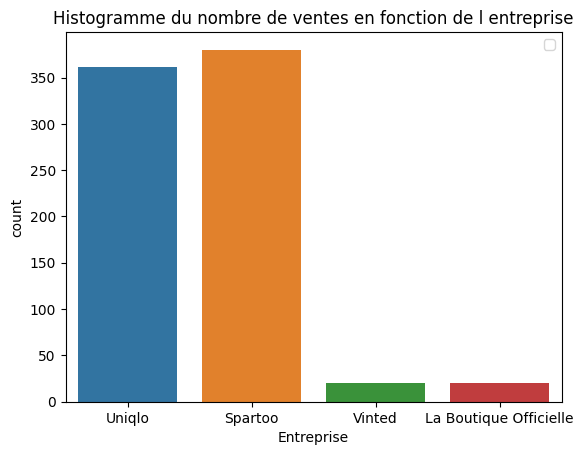

In [107]:
# Analyse de la distribution des ventes par entreprises

sns.countplot(x="company", data=df_vetements);
plt.xlabel('Entreprise')
plt.legend()
plt.title('Histogramme du nombre de ventes en fonction de l entreprise');

# ce graphique nous permet de voir que nous avons, dans notre df, beaucoup plus de données de spartoo et uniqlo que vinted 
# ou La Boutique Officielle. cela semble bizarre car nous avons le même nombre de page de chacune des entreprises et chacune
# des pages comportent 20 avis.

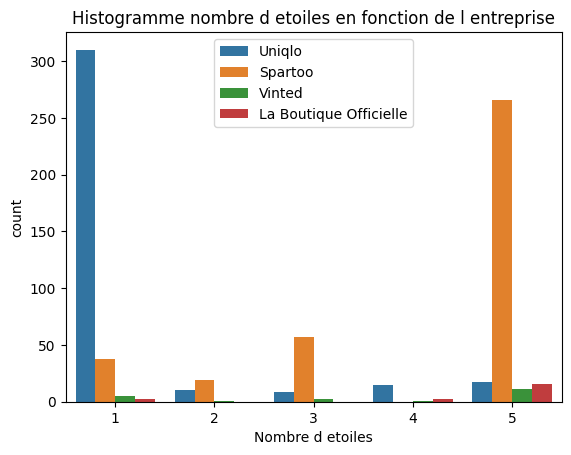

In [117]:
# Analyse de la distribution du nombre d'étoiles par entreprises

sns.countplot(x="notes", hue='company', data=df_vetements)
plt.xlabel('Nombre d etoiles')
plt.legend()
plt.title('Histogramme nombre d etoiles en fonction de l entreprise');

# les données n'étant pas équilibrées (cf.code ci dessus), nous peinons à voir la distribution des notes de vinted et
# de la Boutique Officielle

In [120]:
print("Le pourcentage de répartition des étoiles est de : ", df_vetements["notes"].value_counts(normalize = True)*100)

# Nous constatons ainsi que les gens sont extrêmes dans leurs évaluations :
# ils déposent soit un très mauvais, soit un excellent commentaire

Le pourcentage de répartition des étoiles est de :  notes
1    45.454545
5    39.692702
3     8.706786
2     3.841229
4     2.304738
Name: proportion, dtype: float64


In [110]:
# visualisation des 20 clients déposant le plus de commentaires
top_20 = df_vetements.nlargest(20, 'nb_avis_client')
print(top_20[['company', 'client', 'nb_avis_client', 'notes']])

# on remarque qu'une cliente est particulièrement active sur Trustpilot

                    company            client  nb_avis_client  notes
172                  Uniqlo             Sarah             147      2
352                  Uniqlo            Thomas              70      1
191                  Uniqlo                 g              41      1
317                  Uniqlo    Client Valerie              41      1
327                  Uniqlo          Mocoloco              41      1
360                  Uniqlo      Jessica Tclt              41      1
359                  Uniqlo              Reno              40      5
221                  Uniqlo     Arquenso42340              34      4
766  La Boutique Officielle     Faÿ Alexandre              31      5
201                  Uniqlo              Fred              30      3
355                  Uniqlo              G.B.              28      5
139                  Uniqlo       Catherine B              26      1
215                  Uniqlo      Didier COLIN              25      1
228                  Uniqlo       

In [142]:
# évolution de la moyenne d'étoiles par entreprises, par an

grouped_data = df_vetements.groupby(['company', pd.Grouper(key='date_commentaire', freq='Y')])['notes'].mean()

for company, data in grouped_data.groupby('company'):
    plt.plot(data['annee_commande'], data['notes'], label=company)

"""
grouper_annee = pd.Grouper(key = 'date_commentaire', freq = 'Y')
groupby_annee_notes = df_vetements.groupby([grouper_annee, df_vetements['notes']]).agg({'notes':'mean'}).unstack()
groupby_annee_notes.plot(figsize = (20, 4.5), style = 'o-');
"""    
    
plt.xlabel('Année')
plt.ylabel('Moyenne des notes')
plt.title('Évolution de la moyenne des notes par entreprise et par année')
plt.legend()
plt.show()


KeyError: 'annee_commande'

In [ ]:
# répartition des catégories de commentaires par entreprises (text mining)

In [ ]:
# évolution du nombre de réponse faites au client par entreprises, par an (à lire avec évolution de la moyenne)

In [ ]:
# moyenne d'étoiles des clients en fonction de l'entreprises qui répondent ou pas

### 1.3 Exploitation des données